ABHISHEK PANDA
10478684

### 1-Open the baseball_100 data set. The dataset contains statistics for batters who have at least 100 at bats. We are interested in investigating whether there is a linear relationship between the number of times a player has been caught stealing bases and the number of stolen bases the player has. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from scipy.stats.mstats import zscore

In [2]:
#load the dataset
bb = pd.read_csv("Baseball_100.csv")

1. Construct a scatter plot with ‘caught’ as the response. Is there evidence of a linear relationship? 

Text(0, 0.5, 'caught_stealing')

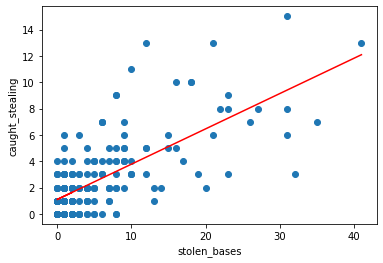

In [3]:
x = bb.stolen_bases
y = bb.caught_stealing
plt.scatter(x,y)
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b, color = 'red')
plt.xlabel("stolen_bases")
plt.ylabel("caught_stealing")

2. Based on the scatter plot, is a transformation to linearity called for? Why or why not?

stolen_bases and caught_stealing are linearly separable after plotting the regression line, so no transformation is needed.

3. Do not perform any transformation. Perform the regression of the number of times a player has been caught stealing bases versus the number of stolen bases the player has.

In [4]:
res = ols('caught_stealing  ~ stolen_bases', data=bb,).fit()

4. Analyze the results. How good is the model? Why?

In [5]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        caught_stealing   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     199.1
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.06e-32
Time:                        20:15:30   Log-Likelihood:                -445.84
No. Observations:                 209   AIC:                             895.7
Df Residuals:                     207   BIC:                             902.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0986      0.177      6.216   

This is a noteworthy model because the coef is high, p>|t| is zero, and the Adj. R-squared is also high.

5. What is the confidence interval for predicting the number of times a player is caught stealing bases given his number of stolen bases? 

In [6]:
data = pd.DataFrame()
data['parameter'] = res.params.index
data['value'] = res.params.values
data['probsh0'] = res.pvalues.values
parm_table = data.sort_values(by='probsh0')
print(res.conf_int())

                     0         1
Intercept     0.750188  1.447067
stolen_bases  0.230584  0.305490


6. What is the confidence interval for predicting the average number of times a player is caught stealing given his number of stolen bases? 

In [7]:
print(parm_table)

      parameter     value       probsh0
1  stolen_bases  0.268037  4.057834e-32
0     Intercept  1.098628  2.764152e-09


In [8]:
infl=res.get_influence()
cooks, p = infl.cooks_distance
leverage = infl.hat_matrix_diag
df_inf = pd.DataFrame()
df_inf['cooks'] = cooks
df_inf['leverage'] = leverage
df_inf

,cooks,leverage
0,0.014093,0.112492
1,0.000566,0.004967
2,0.253487,0.060308
3,0.391577,0.064756
4,0.000962,0.004803
...,...,...
204,0.000283,0.005859
205,0.000006,0.005338
206,0.000106,0.006551
207,0.001880,0.005859


7. What are the top 5 influential points?

In [9]:
#Influential Points 
influential = df_inf.nlargest(5, ['cooks'])
influential["cooks"]

3     0.391577
2     0.253487
5     0.134103
15    0.124130
10    0.094130
Name: cooks, dtype: float64

8. What are the top 5 high leverage points?

In [10]:
#Leverage Points 
leverage = df_inf.nlargest(5, ['leverage'])
leverage['leverage']

0     0.112492
5     0.079126
3     0.064756
2     0.060308
10    0.060308
Name: leverage, dtype: float64

### 2-Use the “cereal_ds” dataset and the following predictors to build the models listed below. For each part, fit your final model and show the results. 

In [11]:
c = pd.read_csv("Cereal_ds.csv")

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = c[['sugars', 'fat', 'fiber', 'weight', 'vitamins', 'cups' ]]
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

   features        VIF
0    sugars   4.777619
1       fat   2.280972
2     fiber   2.765557
3    weight  29.186006
4  vitamins   2.923803
5      cups  12.837896


We choose fat cause it has the least VIF value. 

In [13]:
# develp your regresion model
res1 = ols('rating  ~ fat',data=c,).fit()

In [14]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     15.09
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           0.000219
Time:                        20:15:30   Log-Likelihood:                -305.16
No. Observations:                  77   AIC:                             614.3
Df Residuals:                      75   BIC:                             619.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.4522      2.093     23.150      0.0

The model has high VIF when built with fat and rating

Selecting the features with least VIF i.e fat and fiber 

In [15]:
res2 = ols('rating  ~ fat+fiber',data=c,).fit()

In [16]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     39.59
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           2.04e-12
Time:                        20:15:30   Log-Likelihood:                -284.21
No. Observations:                  77   AIC:                             574.4
Df Residuals:                      74   BIC:                             581.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.0940      1.894     21.694      0.0

In [17]:
res3 = ols('rating  ~ fat+fiber+sugars+weight+vitamins+cups',data=c,).fit()

In [18]:
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     98.67
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           3.78e-32
Time:                        20:15:30   Log-Likelihood:                -225.72
No. Observations:                  77   AIC:                             465.4
Df Residuals:                      70   BIC:                             481.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     61.0762      4.985     12.253      0.0

In [19]:
res4 = ols('rating  ~ fat+fiber+sugars+vitamins+cups',data=c,).fit()

In [20]:
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     116.1
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           9.53e-33
Time:                        20:15:30   Log-Likelihood:                -226.89
No. Observations:                  77   AIC:                             465.8
Df Residuals:                      71   BIC:                             479.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2656      3.055     18.093      0.0

I have choosen the above variables because they have lower VIF compared to weight. 

In [21]:
res5 = ols('rating  ~ fat+fiber+sugars+weight+vitamins+cups+shelf',data=c,).fit()

In [22]:
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     86.62
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.22e-31
Time:                        20:15:30   Log-Likelihood:                -224.40
No. Observations:                  77   AIC:                             464.8
Df Residuals:                      69   BIC:                             483.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.7487      5.381     10.733      0.0

Because P > |t| is bigger than 0.05, shelf does not develop a good association with rating.